### Random Forest Classifier

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
rndm_frst = RandomForestClassifier()

In [5]:
rndm_frst.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
new_obs = [[2, 3, 4, 1]]

In [7]:
rndm_frst.predict(new_obs)

array([1])

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Feature Importance

In [12]:
feat_import = rndm_frst.feature_importances_

In [13]:
feat_import

array([0.18461624, 0.01904746, 0.5328887 , 0.26344759])

In [14]:
indicies = np.argsort(feat_import)[::-1]

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
indicies

array([2, 3, 0, 1])

In [16]:
names = [iris.feature_names[i] for i in indicies]

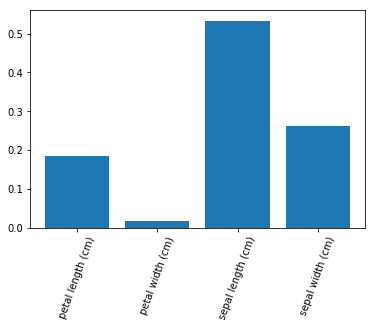

In [17]:
plt.figure()
plt.bar(range(len(feat_import)), feat_import)
plt.xticks(range(len(feat_import)), names, rotation = 70);

### Entropy Criteria

In [21]:
rndm_frst_entpy = RandomForestClassifier(criterion='entropy')

In [22]:
rndm_frst_entpy.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
rndm_frst_entpy.predict(new_obs)

array([1])

### Regression Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
boston = datasets.load_boston()

In [21]:
features = boston.data[:, 0:2]
target = boston.target

In [22]:
reg_forest = RandomForestRegressor()

In [23]:
reg_forest.fit(features, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Feature Selection



In [27]:
from sklearn.feature_selection import SelectFromModel

#lets use a model and then select the most important features using that model

In [37]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [38]:
random_frst = RandomForestClassifier()

In [39]:
selector = SelectFromModel(random_frst, threshold = 0.3)
# instantiate it
# set a criteria for variance of .3

In [40]:
feat_importance = selector.fit_transform(X,y)

In [41]:
feat_importance[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [42]:
model = random_frst.fit(feat_importance, y)

In [43]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
from sklearn.pipeline import make_pipeline

In [47]:
pipe = make_pipeline(SelectFromModel(random_frst, threshold=0.3), RandomForestClassifier())

In [48]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('selectfrommodel', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_s...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [33]:
model.score(feat_importance, y)

0.9866666666666667

### Imbalanced Class

In [34]:
X = iris.data[30:]
y = iris.target[30:]

In [35]:
X.shape

(120, 4)

In [36]:
y.shape

(120,)

In [37]:
balanced_forest = RandomForestClassifier(class_weight= "balanced")

In [38]:
model = balanced_forest.fit(X, y)

In [39]:
model.score(X, y)

1.0

### Boosting

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
X = iris.data
y = iris.target

In [42]:
ada_boost = AdaBoostClassifier()

In [43]:
model = ada_boost.fit(X, y)

### Out of Bag Error

In [46]:
rndm_frst = RandomForestClassifier(n_estimators=1000, oob_score=True)

In [47]:
model = rndm_frst.fit(X, y)

In [48]:
rndm_frst.oob_score_

0.9533333333333334